<a href="https://colab.research.google.com/github/Priyabrat845/Airbnb-Booking-Analysis/blob/main/Copy_of_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns

In [3]:
path = '/content/drive/MyDrive/Colab Notebooks/Airbnb NYC 2019.csv'
airbnb = pd.read_csv(path)
airbnb.head(3)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


In [ ]:
#airbnb.describe()

In [4]:
airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [5]:
airbnb['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [6]:
top_host=airbnb.host_id.value_counts().head(10)
top_host

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
16098958      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

In [7]:
top_hosts_df = pd.DataFrame(top_host)
top_hosts_df.head()

,host_id
219517861,327
107434423,232
30283594,121
137358866,103
12243051,96


In [8]:
top_hosts_df.reset_index(inplace=True)
top_hosts_df.rename(columns={'index':'Host_ID', 'host_id':'Total_Listing_Count'}, inplace=True)
top_hosts_df


,Host_ID,Total_Listing_Count
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,12243051,96
5,16098958,96
6,61391963,91
7,22541573,87
8,200380610,65
9,7503643,52


[Text(0, 0, '7503643'),
 Text(0, 0, '12243051'),
 Text(0, 0, '16098958'),
 Text(0, 0, '22541573'),
 Text(0, 0, '30283594'),
 Text(0, 0, '61391963'),
 Text(0, 0, '107434423'),
 Text(0, 0, '137358866'),
 Text(0, 0, '200380610'),
 Text(0, 0, '219517861')]

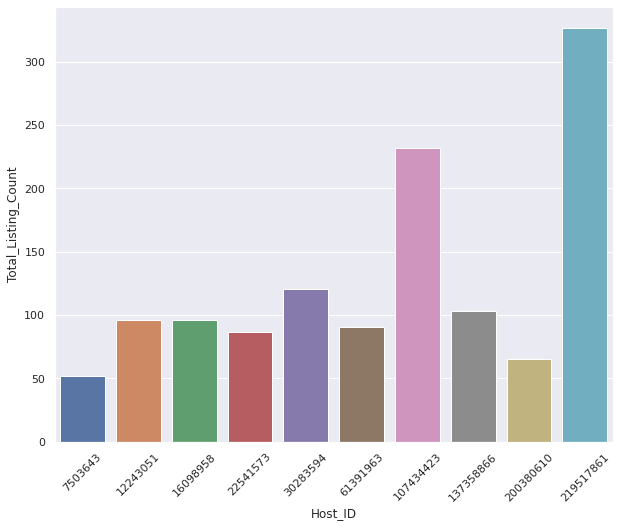

In [9]:
sns.set(rc={'figure.figsize':(10,8)})
plot1=sns.barplot(x='Host_ID',y='Total_Listing_Count',data=top_hosts_df)
plot1.set_xticklabels(plot1.get_xticklabels(), rotation=45)

In [10]:
airbnb.drop(['id','name','last_review'],axis=1,inplace=True)
airbnb.head(3)

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365


In [11]:
airbnb['reviews_per_month'].fillna(0,inplace=True)


In [12]:
airbnb.head(5)

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [ ]:
#hosts_each_neighbourhood_group=airbnb.groupby('neighbourhood_group')['host_id']
#print(hosts_each_neighbourhood_group)


In [19]:
#Total no of hosts in different neighbourhood groups or locations.
hosts_each_neighbourhood_group=airbnb.neighbourhood_group.value_counts()
neighbourhood_hosts_df = pd.DataFrame(hosts_each_neighbourhood_group)
neighbourhood_hosts_df

,neighbourhood_group
Manhattan,21661
Brooklyn,20104
Queens,5666
Bronx,1091
Staten Island,373


In [20]:
neighbourhood_hosts_df.reset_index(inplace=True)
neighbourhood_hosts_df.rename(columns={'index':'neighbourhood_group', 'neighbourhood_group':'Total_hosts'}, inplace=True)
neighbourhood_hosts_df


,neighbourhood_group,Total_hosts
0,Manhattan,21661
1,Brooklyn,20104
2,Queens,5666
3,Bronx,1091
4,Staten Island,373


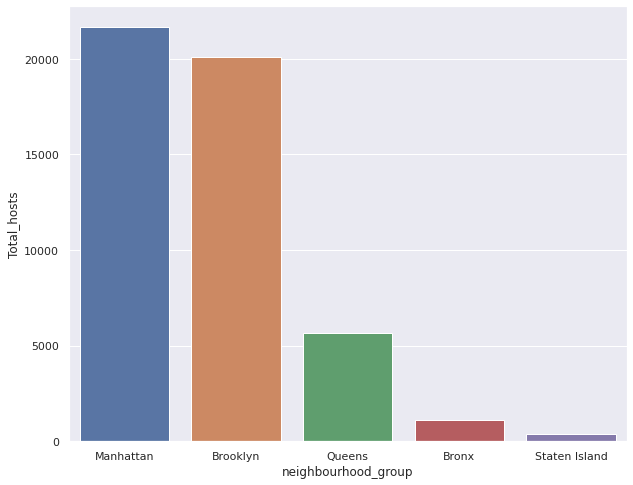

In [21]:
sns.barplot(x='neighbourhood_group',y='Total_hosts',data=neighbourhood_hosts_df)

In [ ]:
airbnb.head()

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


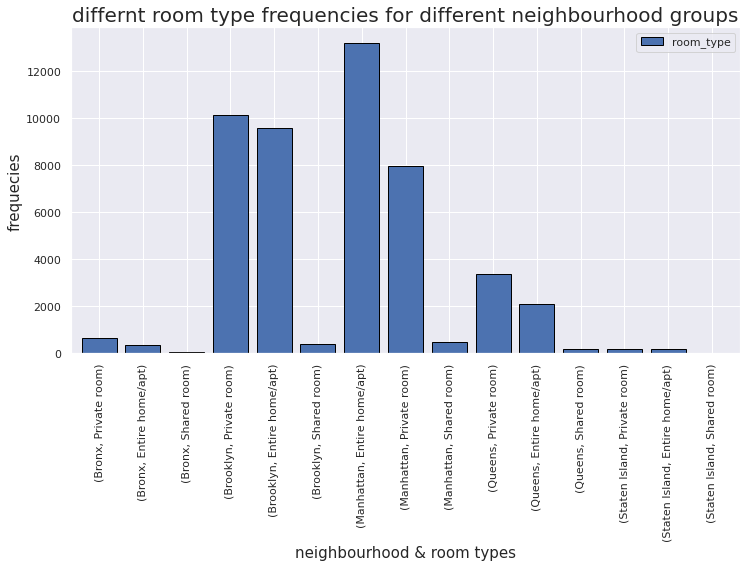

In [31]:
ax=airbnb.groupby('neighbourhood_group')['room_type'].value_counts().plot.bar(figsize=(12,6),width=0.8,linewidth=1,edgecolor='black')
ax.set_title("differnt room type frequencies for different neighbourhood groups", fontsize = 20)
# Set x and y-labels
ax.set_xlabel("neighbourhood & room types", fontsize = 15)
ax.set_ylabel("frequecies", fontsize = 15)
ax.legend()


In [23]:
#Total no of rooms available for different room types
total_room_types=airbnb.room_type.value_counts()
total_room_types_df = pd.DataFrame(total_room_types)
total_room_types_df


,room_type
Entire home/apt,25409
Private room,22326
Shared room,1160


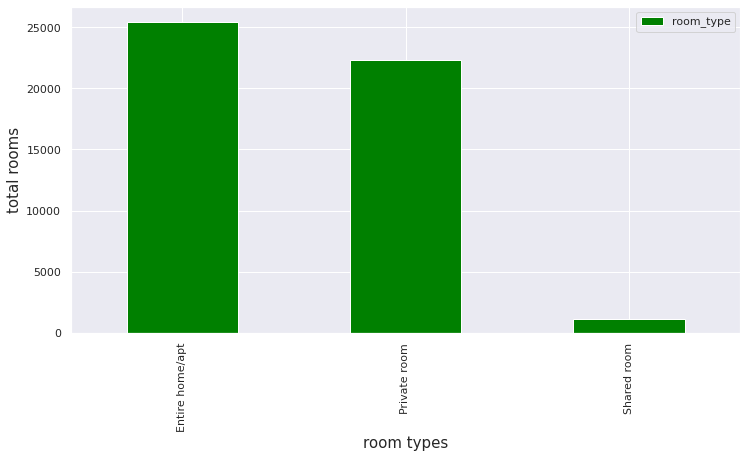

In [29]:
#Total no of rooms available for different room types
ax1 = airbnb['room_type'].value_counts().plot.bar(color='green',figsize=(12,6),width=0.5)
ax1.set_xlabel('room types',fontsize=15)
ax1.set_ylabel('total rooms',fontsize=15)
ax1.legend()


In [25]:
ax2=airbnb.groupby(['neighbourhood_group','room_type'])['price'].mean()
ax2

neighbourhood_group  room_type      
Bronx                Entire home/apt    127.506596
                     Private room        66.788344
                     Shared room         59.800000
Brooklyn             Entire home/apt    178.327545
                     Private room        76.500099
                     Shared room         50.527845
Manhattan            Entire home/apt    249.239109
                     Private room       116.776622
                     Shared room         88.977083
Queens               Entire home/apt    147.050573
                     Private room        71.762456
                     Shared room         69.020202
Staten Island        Entire home/apt    173.846591
                     Private room        62.292553
                     Shared room         57.444444
Name: price, dtype: float64

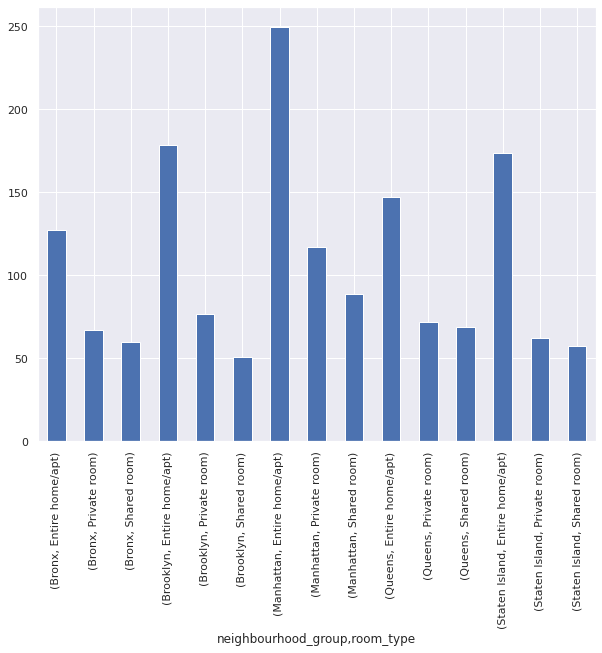

In [28]:
ax2.plot.bar()
